In [107]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [108]:
data = pd.read_csv("test.csv")
display(data.head(5))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [109]:
df = pd.read_csv('test.csv')
print(df.head())


   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  ...  gender       ethnicity jundice austim  \
0         1         0          0  ...       f  White-European      no     no   
1         1         0          1  ...       m          Latino      no    yes   
2         1         1          1  ...       m          Latino     yes    yes   
3         1         0          1  ...       f  White-European      no    yes   
4         1         0          0  ...       f               ?      no     no   

   contry_of_res used_app_before result     age_desc relation Class/

In [110]:
df.shape


(704, 21)

In [111]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [112]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A1_Score,704.0,0.721591,0.448535,0.0,0.0,1.0,1.0,1.0
A2_Score,704.0,0.453125,0.498152,0.0,0.0,0.0,1.0,1.0
A3_Score,704.0,0.457386,0.498535,0.0,0.0,0.0,1.0,1.0
A4_Score,704.0,0.495739,0.500337,0.0,0.0,0.0,1.0,1.0
A5_Score,704.0,0.498580,0.500353,0.0,0.0,0.0,1.0,1.0
A6_Score,704.0,0.284091,0.451301,0.0,0.0,0.0,1.0,1.0
A7_Score,704.0,0.417614,0.493516,0.0,0.0,0.0,1.0,1.0
A8_Score,704.0,0.649148,0.477576,0.0,0.0,1.0,1.0,1.0
A9_Score,704.0,0.323864,0.468281,0.0,0.0,0.0,1.0,1.0
A10_Score,704.0,0.573864,0.494866,0.0,0.0,1.0,1.0,1.0


In [113]:
data.dropna(inplace=True)
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,0.723647,0.452991,0.458689,0.497151,0.498575,0.284900,0.417379,0.650997,0.324786,0.574074,29.698006,4.883191
std,0.447512,0.498140,0.498646,0.500348,0.500354,0.451689,0.493478,0.476995,0.468629,0.494835,16.507465,2.498051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


## data cleaning

In [114]:
df['ethnicity'].value_counts()

ethnicity
White-European     233
Asian              123
?                   95
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
others               1
Name: count, dtype: int64

In [115]:
df['relation'].value_counts()


relation
Self                        522
?                            95
Parent                       50
Relative                     28
Others                        5
Health care professional      4
Name: count, dtype: int64

## data analysis

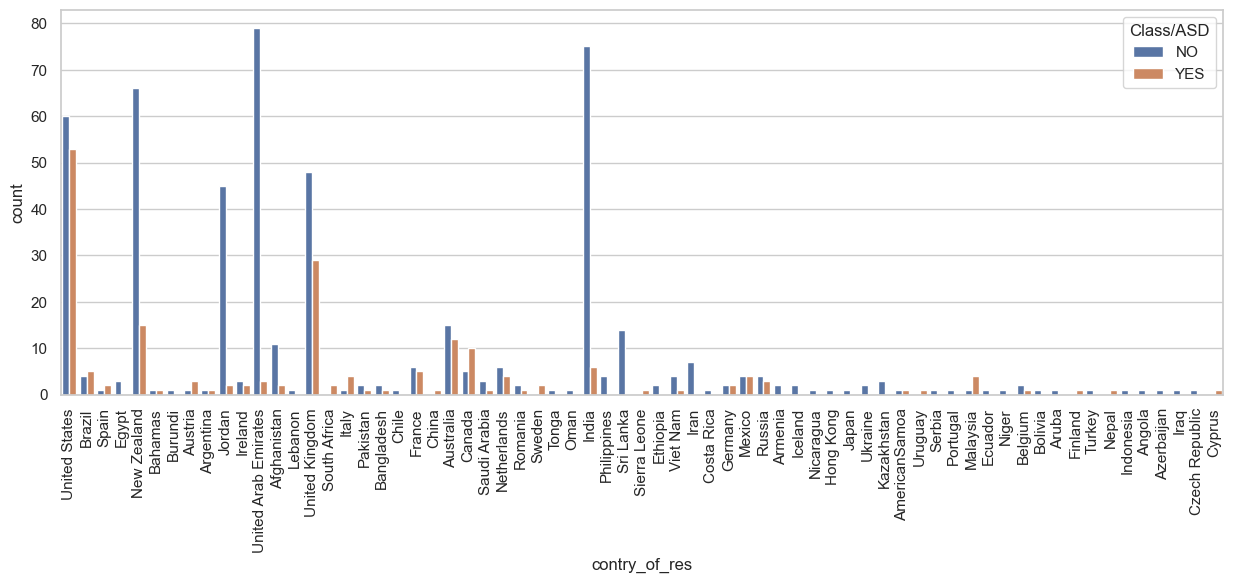

In [116]:
plt.figure(figsize=(15,5))
sb.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()

## removing null values

In [117]:
newrecords = len(data.index)
newasd_yes = len(data[data['Class/ASD'] == 'Yes'])
newasd_no = len(data[data['Class/ASD'] == 'No'])
print(f'Total number of records  : {newrecords}')
print(f'Number of individuals with ASD : {newasd_yes}')
print(f'Number of individuals without ASD : {newasd_no}')

Total number of records  : 702
Number of individuals with ASD : 0
Number of individuals without ASD : 0


## visualizations

In [118]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

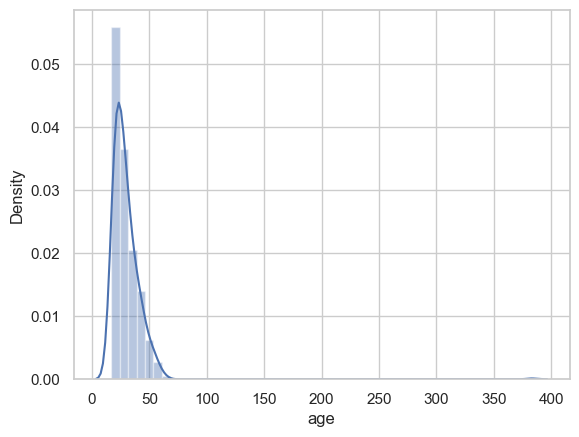

In [119]:
sb.distplot(df['age'])
plt.show()

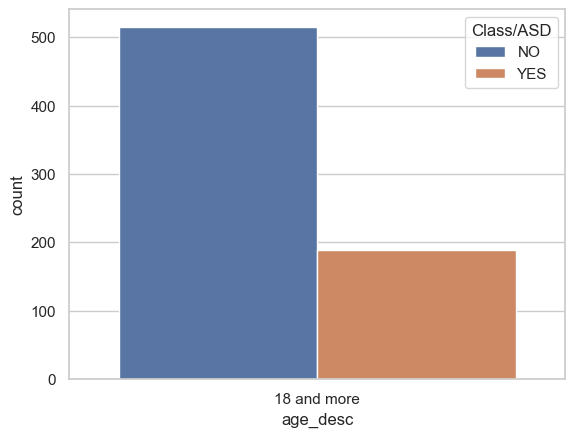

In [120]:
sb.countplot(x=df['age_desc'], hue=df['Class/ASD'])
plt.show()

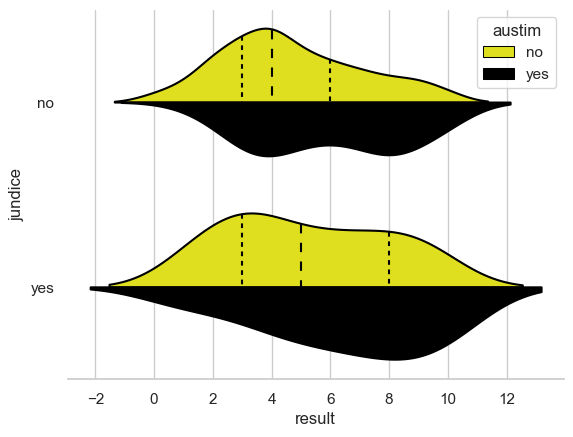

In [121]:
sns.violinplot(x="result", y="jundice", hue="austim", data=data, split=True,inner="quart", palette={'yes': "black", 'no': "yellow"})
sns.despine(left=True)

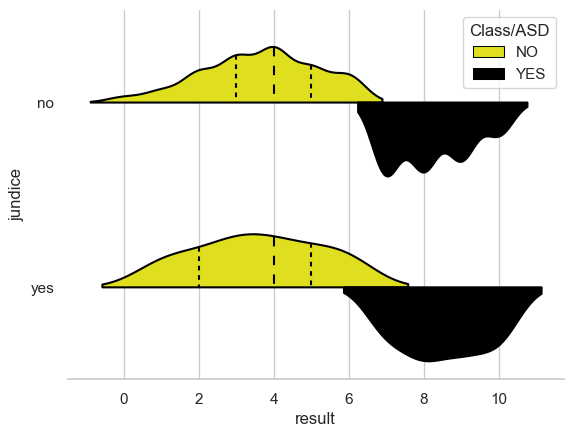

In [122]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="result", y="jundice", hue="Class/ASD", data=data, split=True,
                inner="quart", palette={'YES': "black", 'NO': "yellow"})
sns.despine(left=True)

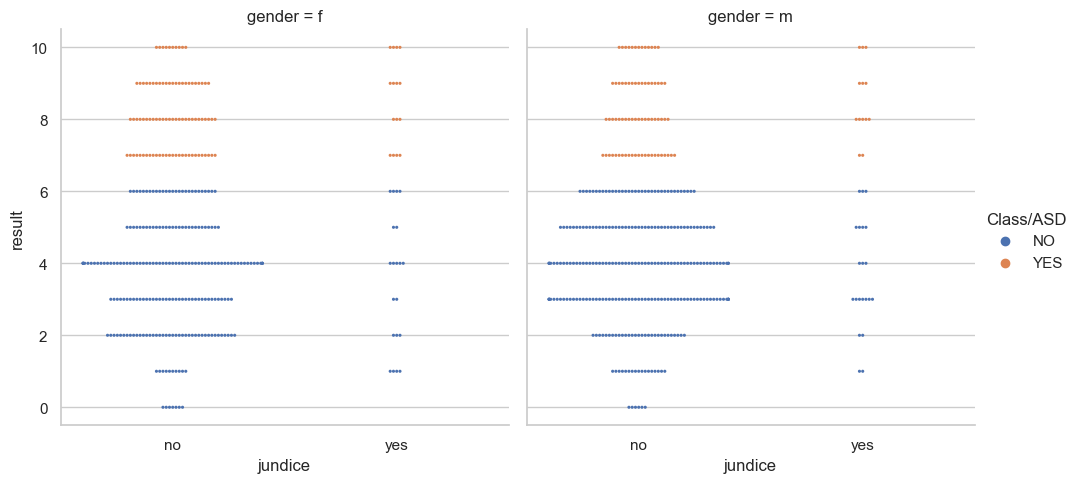

In [123]:
sns.catplot(x="jundice", y="result", hue="Class/ASD", s = 5, col="gender", data=data, kind="swarm");

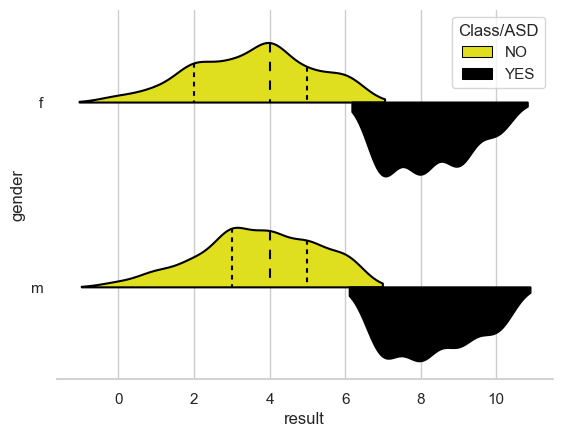

In [124]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="result", y="gender", hue="Class/ASD", data=data, split=True,
                inner="quart", palette={'YES': "black", 'NO': "yellow"})
sns.despine(left=True)

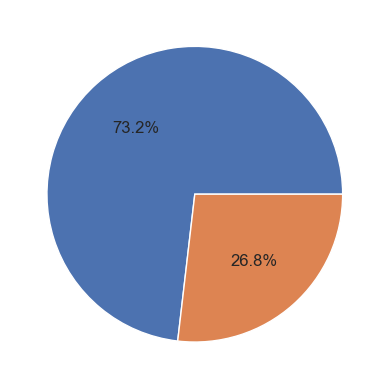

In [125]:
plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()

In [126]:
data_raw = data['Class/ASD']
features_raw = data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result',
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

In [127]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num = ['age','result']
features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[num] = scaler.fit_transform(features_raw[num])
display(features_minmax_transform.head(5))

,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.024590,f,White-European,no,no,United States,0.6,Self,1,1,1,1,0,0,1,1,0,0
1,0.019126,m,Latino,no,yes,Brazil,0.5,Self,1,1,0,1,0,0,0,1,0,1
2,0.027322,m,Latino,yes,yes,Spain,0.8,Parent,1,1,0,1,1,0,1,1,1,1
3,0.049180,f,White-European,no,yes,United States,0.6,Self,1,1,0,1,0,0,1,1,0,1
4,0.062842,f,?,no,no,Egypt,0.2,?,1,0,0,0,0,0,0,1,0,0


In [128]:
features_final = pd.get_dummies(features_minmax_transform)
features_final.head(5)

,age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,...,contry_of_res_United Kingdom,contry_of_res_United States,contry_of_res_Uruguay,contry_of_res_Viet Nam,relation_?,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
0,0.024590,0.6,1,1,1,1,0,0,1,1,...,False,True,False,False,False,False,False,False,False,True
1,0.019126,0.5,1,1,0,1,0,0,0,1,...,False,False,False,False,False,False,False,False,False,True
2,0.027322,0.8,1,1,0,1,1,0,1,1,...,False,False,False,False,False,False,False,True,False,False
3,0.049180,0.6,1,1,0,1,0,0,1,1,...,False,True,False,False,False,False,False,False,False,True
4,0.062842,0.2,1,0,0,0,0,0,0,1,...,False,False,False,False,True,False,False,False,False,False


Text(0, 0.5, 'Frequency')

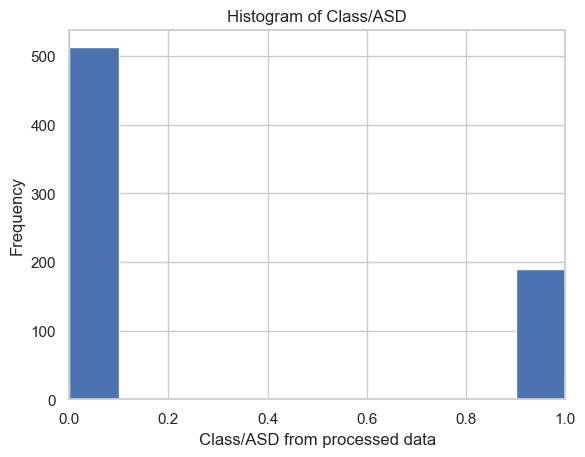

In [129]:
data_classes = data_raw.apply(lambda x : 1 if x == 'YES' else 0)
plt.hist(data_classes, bins=10)
plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')

## feature engineering

In [130]:
def convertAge(age):
    if age < 4:
        return 'Toddler'
    elif age < 12:
        return 'Kid'
    elif age < 18:
        return 'Teenager'
    elif age < 40:
        return 'Young'
    else:
        return 'Senior'
 
df['ageGroup'] = df['age'].apply(convertAge)

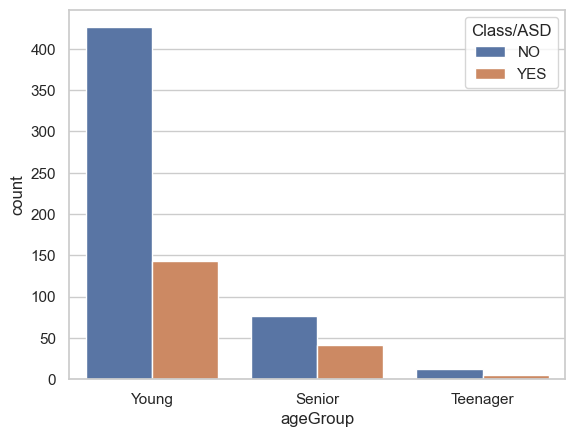

In [131]:
sb.countplot(x=df['ageGroup'], hue=df['Class/ASD'])
plt.show()

In [132]:
def add_feature(data):
   
  # Creating a column with all values zero
  data['sum_score'] = 0
  for col in data.loc[:,'A1_Score':'A10_Score'].columns:
     
    # Updating the 'sum_score' value with scores
    # from A1 to A10
    data['sum_score'] += data[col]
 
  # Creating a random data using the below three columns
  data['ind'] = data['austim'] + data['used_app_before'] + data['jundice']
 
  return data
 
df = add_feature(df)

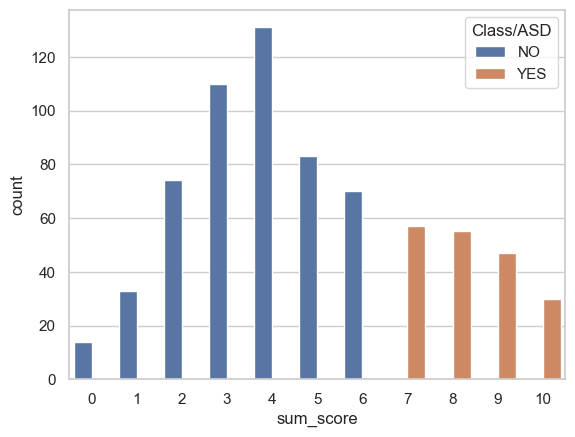

In [133]:
sb.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()

In [134]:
df['age'] = df['age'].apply(lambda x: np.log(x))


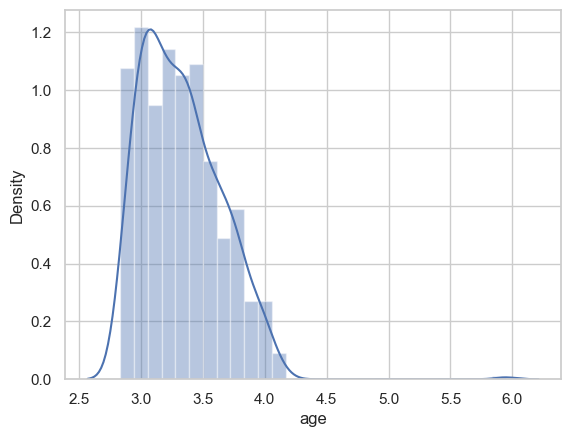

In [135]:
sb.distplot(df['age'])
plt.show()

### Models

In [136]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(features_final,data_classes,test_size=0.2, random_state=1)
print("Train set has {} enteries.".format(X_train.shape[0]))
print("Test set has {} enteries.".format(X_test.shape[0]))

Train set has 561 enteries.
Test set has 141 enteries.


In [150]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dmodel = DecisionTreeClassifier()
dmodel.fit(X_train.values, y_train)
y_pred = dmodel.predict(X_test.values)
print('True : ', y_test.values[0:25])
print('False :', y_pred[0:25])

True :  [1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0]
False : [1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0]


In [151]:
from sklearn import metrics
conf = metrics.confusion_matrix(y_test, y_pred)
print(conf)
TP = cm[1,1]
FP = cm[0,1]
TN = cm[0,0]
FN = cm[1,0]
print('Accuracy:')
print((TN+TP)/float(TP+TN+FP+FN))
print('Error:')
print((FP+FN)/float(TP+TN+FP+FN))
print('Precision:')
print(metrics.precision_score(y_test,y_pred))
print('Score:')
print(dec_model.score(X_test.values, y_test))

[[101   0]
 [  0  40]]
Accuracy:
1.0
Error:
0.0
Precision:
1.0
Score:
1.0


In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rndm_model = RandomForestClassifier(n_estimators=5, random_state=1)
csvscore = cross_val_score(rndm_model, features_final, data_classes, cv =10)
csvscore.mean()

0.9900603621730383

In [154]:
from sklearn import svm
svm_model = svm.SVC(kernel='linear', C=1, gamma=2)
csvscore = cross_val_score(svm_model, features_final, data_classes, cv =10)
csvscore.mean()

1.0

In [155]:
from sklearn import neighbors
knn_model = neighbors.KNeighborsClassifier(n_neighbors=10)
csvscore = cross_val_score(knn_model, features_final, data_classes, cv =10)
csvscore.mean()

0.9458752515090543

In [156]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
csvscore = cross_val_score(nb_model, features_final, data_classes, cv =10)
csvscore.mean()

0.8746277665995976

In [157]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
csvscore = cross_val_score(lr_model, features_final, data_classes, cv =10)
csvscore.mean()

0.9971428571428571

### model tunning

In [158]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, train_test_split

In [159]:
def f_beta_score(y_true, y_predict):
    return fbeta_score(y_true, y_predict, beta = 0.5)
clf = SVC(random_state = 1)
parameters = {'C':range(1,6),'kernel':['linear','poly','rbf','sigmoid'],'degree':range(1,6)}
scorer = make_scorer(f_beta_score)
grid_obj = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scorer)
grid_fit = grid_obj.fit(X_train.values, y_train)
best_clf = grid_fit.best_estimator_
predictions = (clf.fit(X_train.values, y_train)).predict(X_test.values)
best_predictions = best_clf.predict(X_test.values)

In [160]:
print ("Unoptimized model\n")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ("\nOptimized Model\n")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model

Accuracy score on testing data: 0.9645
F-score on testing data: 0.9574

Optimized Model

Final accuracy score on the testing data: 1.0000
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000
